In [205]:
# NumPy
import numpy as np

# Dataframe operations
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Models
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.linear_model import Perceptron
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

# GridSearchCV
from sklearn.model_selection import GridSearchCV

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix



In [206]:
#Loading datasets

In [207]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
data_df=train_df.append(test_df)

In [208]:
variable=pd.read_csv("variable3.csv")

In [209]:
print(variable)

    Unnamed: 0        名称                                           内容
0            0  survival                              生存結果（1：生存、２：死亡)
1            1    pclass            乗客クラス（1:1stクラス、2:2stクラス、3:3rdクラス)
2            2      name                                           氏名
3            3       sex                                           性別
4            4       age                                           年齢
5            5     sibsp                               乗船している兄弟／配偶者の数
6            6     parch                                 乗船している親／子供の数
7            7    ticket                                       チケット番号
8            8      fare                                         旅客運賃
9            9     cabin                                           船室
10          10  embarked  乗船港(C=cherbourg,Q=Queenstown,S=Southampton)


In [210]:
#Engineering features

In [211]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
#Nameの整理
data_df["Title"]=data_df["Name"]

#"Name"の最初の文字列抜出
for name_string in data_df["Name"]:
    data_df["Title"]=data_df["Name"].str.extract('([A-Za-z]+)\.', expand=True)

In [213]:
data_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [214]:
#重複する敬称をまとめる   
mapping={'Mlle':'Miss','Major':'Mr', 'Col':'Mr', 'Sir':'Mr','Don':'Mr','Mme':'Miss','Jonkheer':'Mr','Lady':'Mrs','Capt':'Mr','Countess':'Mrs','Ms':'Miss','Dona':'Mrs'}
data_df.replace({'Title':mapping},inplace=True)

In [215]:
data_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [216]:
titles=['Dr','Master','Miss','Mr','Mrs','Rev']
for title in titles:
    age_to_impute=data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull())&(data_df['Title']==title), 'Age']=age_to_impute
    
train_df['Age']=data_df['Age'][:891]
test_df['Age']=data_df['Age'][891:]

data_df.drop('Title', axis=1, inplace=True)

In [217]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
#「Family_Size」の生成←Parch（兄弟、配偶者）+SibSp（親、子供）使用
data_df['Family_Size']=data_df['Parch']+data_df['SibSp']

train_df['Family_Size']=data_df['Family_Size'][:891]
test_df['Family_Size']=data_df['Family_Size'][891:]

In [219]:
data_df['Family_Size'].head()

0    1
1    1
2    0
3    1
4    0
Name: Family_Size, dtype: int64

In [220]:
data_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [221]:
data_df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [222]:
data_df["Fare"].isnull().sum()

1

In [223]:
#FARE BINS生成
data_df['Fare'].fillna(data_df['Fare'].median(), inplace=True)

In [224]:
data_df["Fare"].isnull().sum()

0

In [225]:
data_df["Fare"].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [226]:
counts=data_df["Fare"].value_counts()

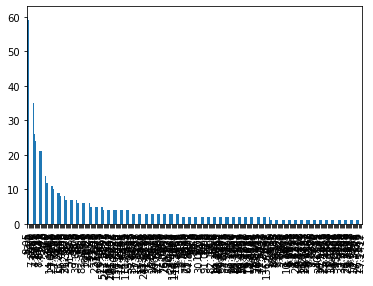

In [227]:
counts.plot.bar()

In [228]:
#分割、qcut　指定した数分割
data_df["FareBin"]=pd.qcut(data_df["Fare"],5)

In [229]:
data_df["FareBin"]

0        (-0.001, 7.854]
1      (41.579, 512.329]
2          (7.854, 10.5]
3      (41.579, 512.329]
4          (7.854, 10.5]
             ...        
413        (7.854, 10.5]
414    (41.579, 512.329]
415      (-0.001, 7.854]
416        (7.854, 10.5]
417     (21.558, 41.579]
Name: FareBin, Length: 1309, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.558] < (21.558, 41.579] < (41.579, 512.329]]

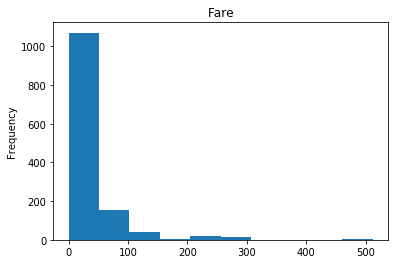

In [230]:
data_df["Fare"].plot.hist(title="Fare")

In [231]:

label=LabelEncoder()
data_df['FareBin_Code']=label.fit_transform(data_df['FareBin'])

In [232]:
data_df["FareBin_Code"].describe()

count    1309.000000
mean        1.983957
std         1.424626
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: FareBin_Code, dtype: float64

In [233]:
train_df['FareBin_Code']=data_df['FareBin_Code'][:891]
test_df['FareBin_COde']=data_df['FareBin_Code'][891:]

train_df.drop(['Fare'],1,inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

In [234]:
#年齢ビンを作る
data_df['AgeBin']=pd.qcut(data_df['Age'], 5)

In [235]:
data_df["AgeBin"]

0       (21.0, 26.0]
1       (30.0, 39.0]
2       (21.0, 26.0]
3       (30.0, 39.0]
4       (30.0, 39.0]
           ...      
413     (26.0, 30.0]
414     (30.0, 39.0]
415     (30.0, 39.0]
416     (26.0, 30.0]
417    (0.169, 21.0]
Name: AgeBin, Length: 1309, dtype: category
Categories (5, interval[float64]): [(0.169, 21.0] < (21.0, 26.0] < (26.0, 30.0] < (30.0, 39.0] < (39.0, 80.0]]

In [236]:
label=LabelEncoder()
data_df['AgeBin_Code']=label.fit_transform(data_df['AgeBin'])

train_df['AgeBin_Code']=data_df['AgeBin_Code'][:891]
test_df['AgeBin_Code']=data_df['AgeBin_Code'][891:]

train_df.drop(['Age'], 1, inplace=True)
test_df.drop(['Age'], 1, inplace=True)

In [237]:
#性別のマッピング、データクリーニング
train_df['Sex'].replace(['male','female'], [0,1], inplace=True)
test_df['Sex'].replace(['male','female'], [0,1], inplace=True)

train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [238]:
#上記より、データセットは下記のようになる。

In [239]:
train_df.head(3)

,Survived,Pclass,Sex,Family_Size,FareBin_Code,AgeBin_Code
0,0,3,0,1,0,1
1,1,1,1,1,4,3
2,1,3,1,0,1,1


In [240]:
train_df.describe()

,Survived,Pclass,Sex,Family_Size,FareBin_Code,AgeBin_Code
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.904602,1.985410,1.910213
std,0.486592,0.836071,0.477990,1.613459,1.411355,1.418504
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000
max,1.000000,3.000000,1.000000,10.000000,4.000000,4.000000


In [250]:
train_df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Family_Size     0
FareBin_Code    0
AgeBin_Code     0
dtype: int64

In [242]:
#Traing
#X and yの生成
X=train_df.drop('Survived',1)
y=train_df['Survived']
X_test=test_df.copy()


In [243]:
#Scalingスケーリング
std_scaler=StandardScaler()
X=std_scaler.fit_transform(X)
#X_test=std_scaler.fit_transform(X_test)
X_test=std_scaler.transform(X_test)


In [244]:
#Grid_SearchCV

In [245]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8650090541267013
KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:    6.8s finished


In [246]:
#GridSearchで見つかったモデルを使用

In [247]:
gd.best_estimator_.fit(X,y)
y_pred=gd.best_estimator_.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [248]:
knn=KNeighborsClassifier(algorithm="auto",leaf_size=26,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=6,p=2,weights='uniform')
knn.fit(X,y)
y_pred=knn.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [249]:
#Make Submission
temp=pd.DataFrame(pd.read_csv("test.csv")['PassengerId'])
temp['Survived']=y_pred
temp.to_csv("submission2.csv",index=False)